Inicializando o projeto...


In [41]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\micae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install xlrd 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\micae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
df = pd.read_excel('default of credit card clients.xls')
print("Arquivo xls carregado !")

Arquivo xls carregado !


Verificação de dados ausentes e tipos

Antes de prosseguir com a análise, é importante verificar se existem valores ausentes e tipos nas colunas

In [44]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [45]:
#verificando os tipos de dados
print(df.dtypes)

Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object


In [46]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Obtivemos um erro no processso, o nome das colunas estava sendo configurado como um dado dentro da tabela, para isso vamos realizar o mapeamento, conversão dos tipos de dados de acordo e verificação das ações realizadas.

In [47]:
# Carregar o dataset diretamente do arquivo .xls
file_path = 'default of credit card clients.xls'  # Ajuste se o nome for diferente
# Exemplo de caminho completo: file_path = 'C:/Users/micae/Downloads/default of credit card clients.xls'
try:
    df = pd.read_excel(file_path, header=0)
    print("Arquivo .xls carregado com sucesso!")
except FileNotFoundError:
    print("Erro: Arquivo não encontrado. Verifique o nome ou caminho do arquivo.")
    print("Arquivos no diretório atual:", os.listdir())
    raise

# Verificar nomes das colunas antes de renomear
print("Nomes das colunas originais:", df.columns.tolist())

# Renomear as colunas para os nomes descritivos
column_mapping = {
    'X1': 'LIMIT_BAL',
    'X2': 'SEX',
    'X3': 'EDUCATION',
    'X4': 'MARRIAGE',
    'X5': 'AGE',
    'X6': 'PAY_0',
    'X7': 'PAY_2',
    'X8': 'PAY_3',
    'X9': 'PAY_4',
    'X10': 'PAY_5',
    'X11': 'PAY_6',
    'X12': 'BILL_AMT1',
    'X13': 'BILL_AMT2',
    'X14': 'BILL_AMT3',
    'X15': 'BILL_AMT4',
    'X16': 'BILL_AMT5',
    'X17': 'BILL_AMT6',
    'X18': 'PAY_AMT1',
    'X19': 'PAY_AMT2',
    'X20': 'PAY_AMT3',
    'X21': 'PAY_AMT4',
    'X22': 'PAY_AMT5',
    'X23': 'PAY_AMT6',
    'Y': 'default_payment_next_month'
}
df = df.rename(columns=column_mapping)

# Para segurança, criar uma cópia do dataset
df = df.copy()

# Converter colunas numéricas para os tipos corretos
numeric_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'default_payment_next_month']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Converter colunas categóricas para o tipo 'category'
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
df[categorical_cols] = df[categorical_cols].astype('category')

# Remover a coluna 'ID', se presente
df = df.drop('ID', axis=1, errors='ignore')

df = df.dropna()  # Remove linhas com valores ausentes
print("Linhas restantes:", len(df))

# Verificar tipos de dados
print("Tipos de dados após conversão:")
print(df.dtypes)

# Verificar as primeiras linhas para confirmar o cabeçalho
print("\nPrimeiras linhas do dataset:")
print(df.head())

Arquivo .xls carregado com sucesso!
Nomes das colunas originais: ['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']
Linhas restantes: 30000
Tipos de dados após conversão:
Unnamed: 0                      object
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                            float64
PAY_0                          float64
PAY_2                          float64
PAY_3                          float64
PAY_4                          float64
PAY_5                          float64
PAY_6                          float64
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AM

In [48]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Unnamed: 0                    0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


Com o mapeamento a linha com o index o apresentou valores nulos e será necessário removelo para dar continuidade as necessidades que serão cumpridas.

In [49]:
# Encontrar a linha com valores ausentes
# Filtrar linhas onde qualquer coluna numérica tem NaN
missing_rows = df[df[numeric_cols].isna().any(axis=1)]

# Exibir a linha completa com valores ausentes
print("Linha(s) com valores ausentes:")
print(missing_rows)

# Exibir o índice da linha para referência
print("\nÍndice da(s) linha(s) com valores ausentes:", missing_rows.index.tolist())

# Verificar quantas linhas têm valores ausentes
print("\nNúmero de linhas com valores ausentes:", len(missing_rows))

Linha(s) com valores ausentes:
Empty DataFrame
Columns: [Unnamed: 0, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default_payment_next_month]
Index: []

[0 rows x 25 columns]

Índice da(s) linha(s) com valores ausentes: []

Número de linhas com valores ausentes: 0


In [50]:
# Remover a linha com valores ausentes (linha 0, cabeçalho duplicado)
df = df.drop(index=0, errors='ignore')

In [51]:
# Verificar novamente valores ausentes para confirmar
print("\nValores ausentes após remoção da linha problemática:")
print(df.isnull().sum())


Valores ausentes após remoção da linha problemática:
Unnamed: 0                    0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In [52]:
# Verificar tipos de dados
print("\nTipos de dados após conversão:")
print(df.dtypes)

# Verificar as primeiras linhas para confirmar o cabeçalho
print("\nPrimeiras linhas do dataset:")
print(df.head())


Tipos de dados após conversão:
Unnamed: 0                      object
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                            float64
PAY_0                          float64
PAY_2                          float64
PAY_3                          float64
PAY_4                          float64
PAY_5                          float64
PAY_6                          float64
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default_payment_next_month     f

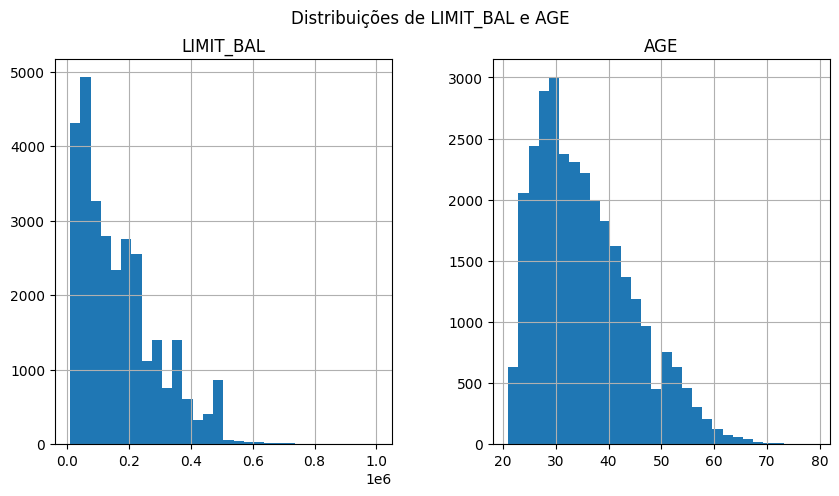

In [58]:
# Histogramas
df[['LIMIT_BAL', 'AGE']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribuições de LIMIT_BAL e AGE')
plt.show()

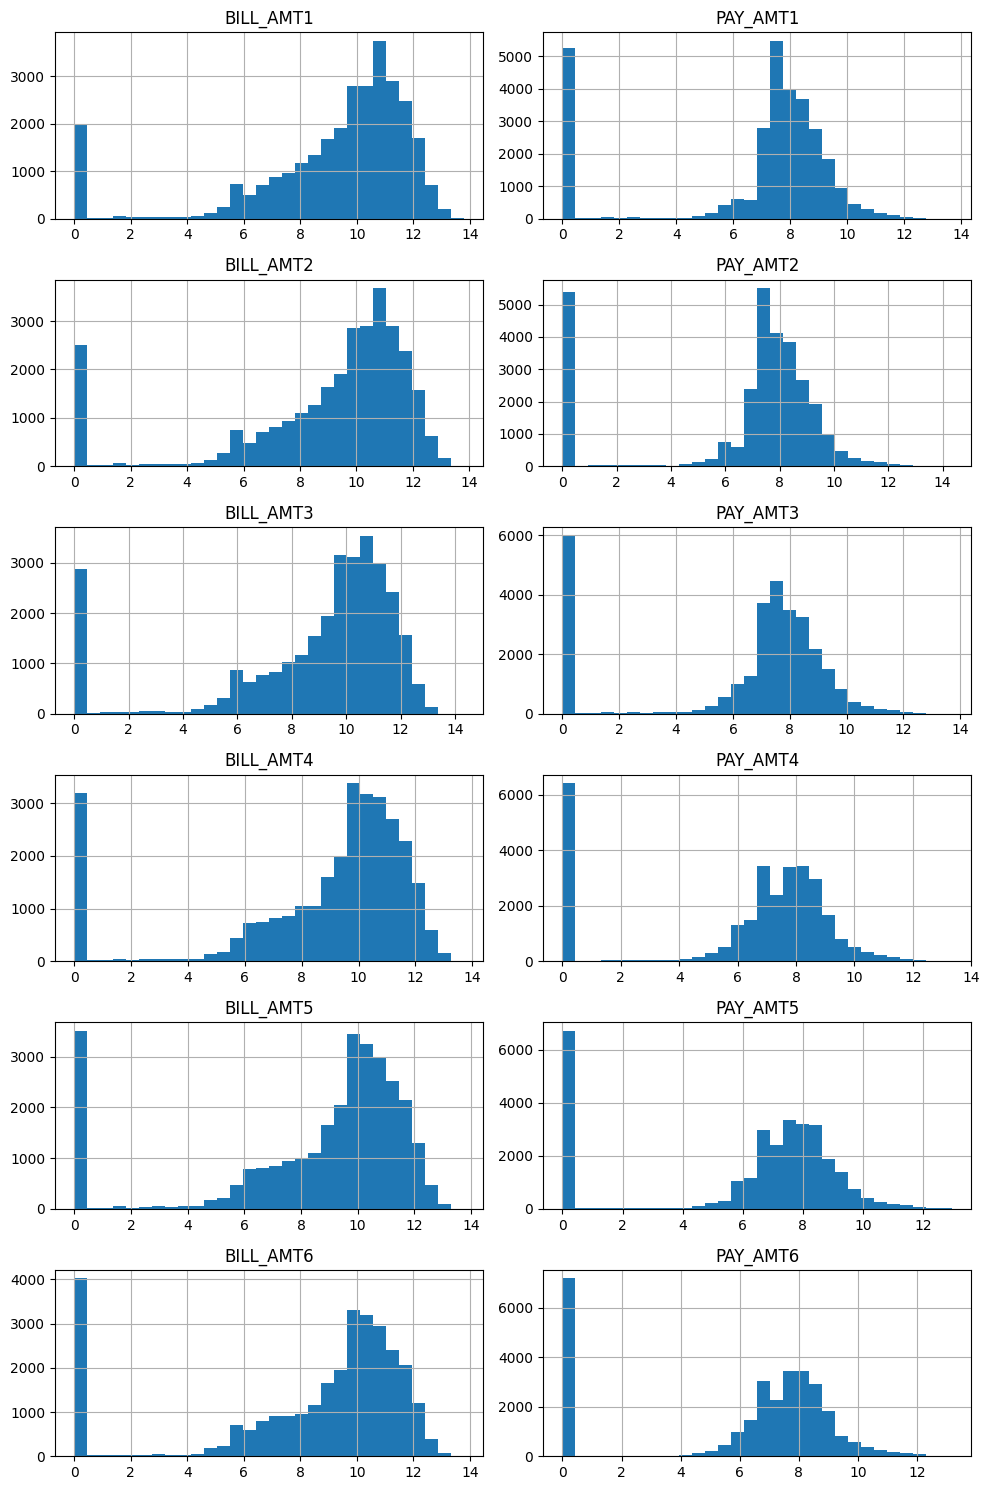

In [54]:
fig, axes = plt.subplots(6, 2, figsize=(10, 15))  # 6 rows, 2 columns
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for i, (bill_col, pay_col) in enumerate(zip(bill_cols, pay_cols)):
    # Plot BILL_AMT histogram (left column)
    ax_bill = axes[i, 0]
    df[bill_col].apply(lambda x: np.log1p(abs(x)) if x != 0 else 0).hist(bins=30, ax=ax_bill)
    ax_bill.set_title(f'{bill_col}')
    
    # Plot PAY_AMT histogram (right column)
    ax_pay = axes[i, 1]
    df[pay_col].apply(lambda x: np.log1p(abs(x)) if x != 0 else 0).hist(bins=30, ax=ax_pay)
    ax_pay.set_title(f'{pay_col}')

plt.tight_layout()
plt.show()

Esse históriograma nos mostra que a uma crescente nas dívidas, o que posteriormente irá gerar maior inadincplencia no mês seguinte uma vez que os valores das faturas são maiores do que os valores pago gerando mais dívida ao cliente.

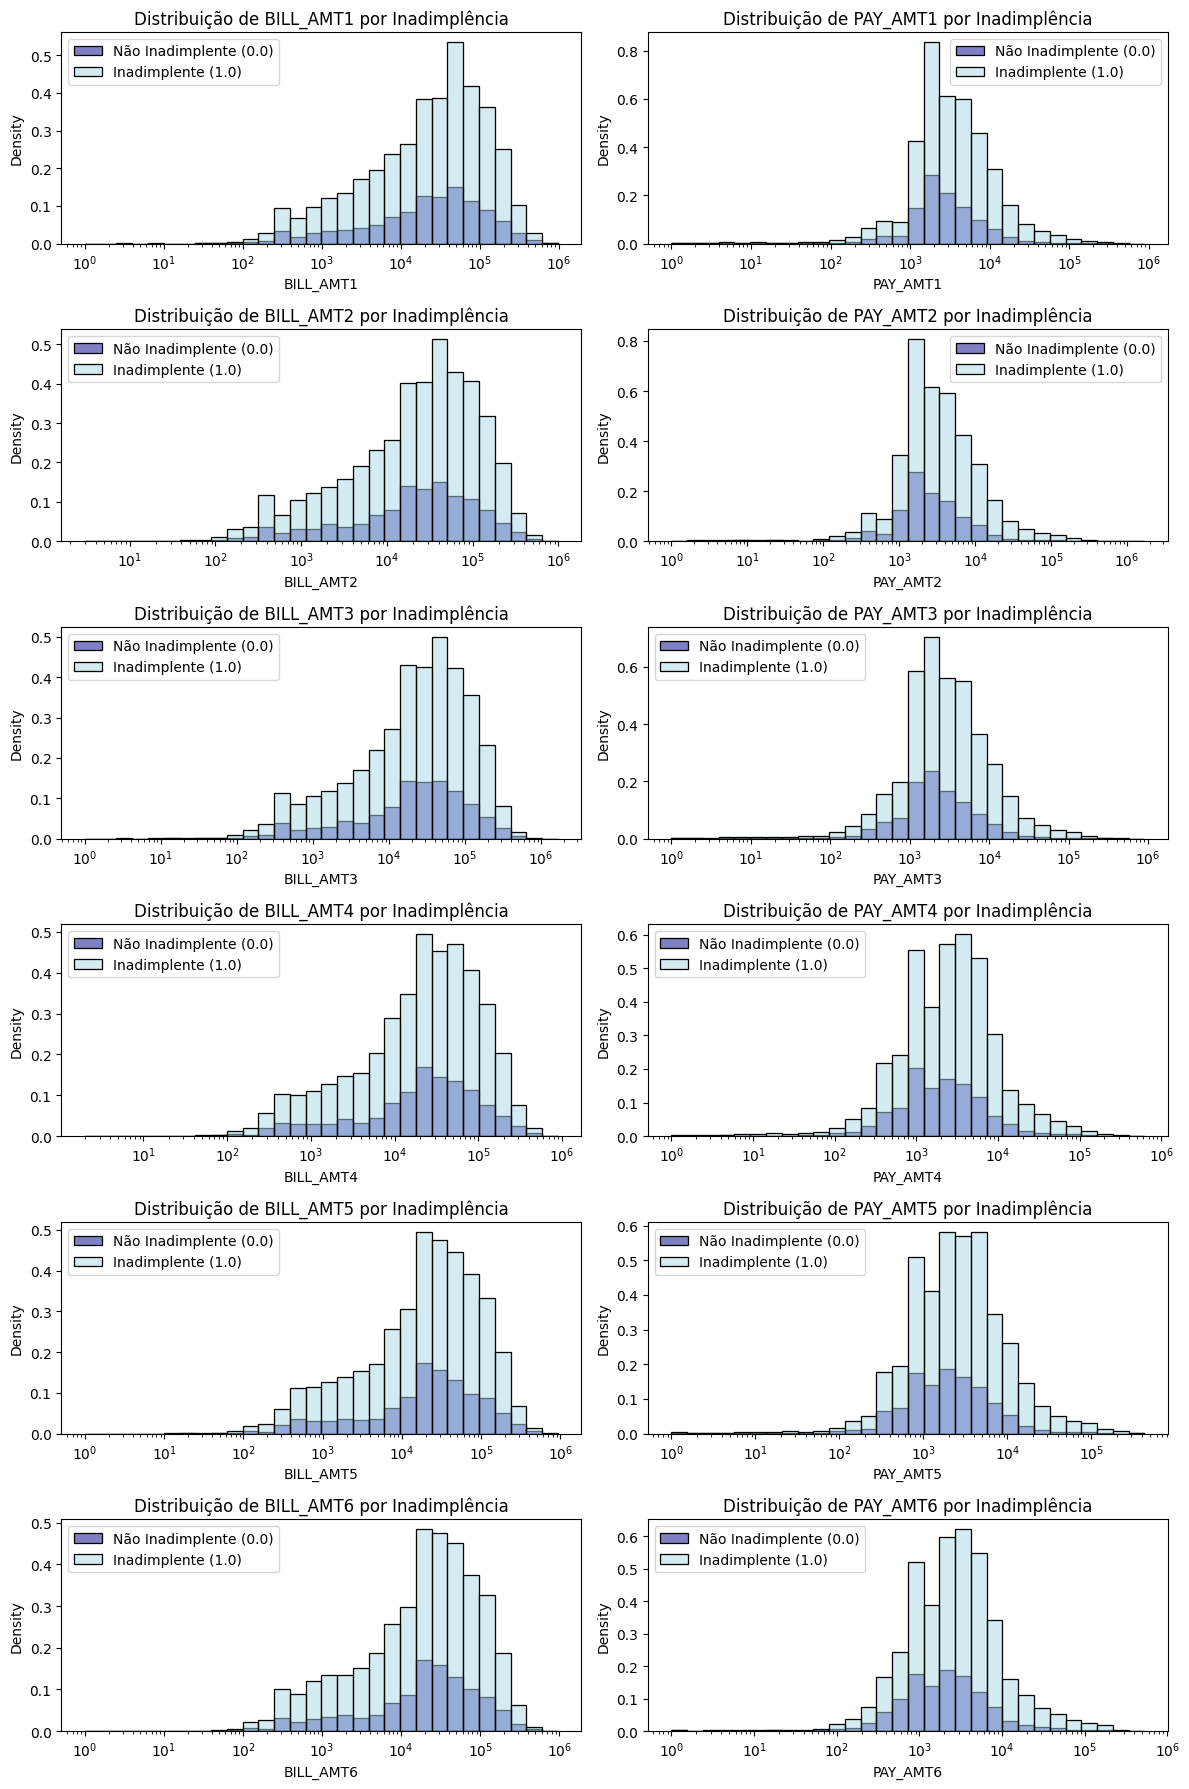

In [55]:

fig, axes = plt.subplots(6, 2, figsize=(12, 18))  # 6 rows, 2 columns
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Combine bill and pay columns for iteration
all_cols = list(zip(bill_cols, pay_cols))

# Define a custom palette with dark blue for 1.0 and light blue for 0.0
custom_palette = ['#ADD8E6', '#00008B']  # Light blue for 0.0, Dark blue for 1.0

for i, (bill_col, pay_col) in enumerate(all_cols):
    # Plot BILL_AMT histogram (left column)
    ax_bill = axes[i, 0]
    sns.histplot(data=df, x=bill_col, hue='default_payment_next_month', bins=30, stat='density', log_scale=True, 
                 palette=custom_palette, ax=ax_bill)
    ax_bill.set_title(f'Distribuição de {bill_col} por Inadimplência')
    ax_bill.legend(labels=['Não Inadimplente (0.0)', 'Inadimplente (1.0)'])  # Clear legend
    
    # Plot PAY_AMT histogram (right column)
    ax_pay = axes[i, 1]
    sns.histplot(data=df, x=pay_col, hue='default_payment_next_month', bins=30, stat='density', log_scale=True, 
                 palette=custom_palette, ax=ax_pay)
    ax_pay.set_title(f'Distribuição de {pay_col} por Inadimplência')
    ax_pay.legend(labels=['Não Inadimplente (0.0)', 'Inadimplente (1.0)'])  # Clear legend

plt.tight_layout()
plt.show()

É possível observar que as maiores faturas são de clientes inadinplentes e que de forma prporcional a maior concentração de pessoas que não pagam também vem deles. posteriormente, isso já é um indícil forte quando construirmos o nosso modelo se utilizarmos de uma correlação dívida/pagamento no mês anterior.

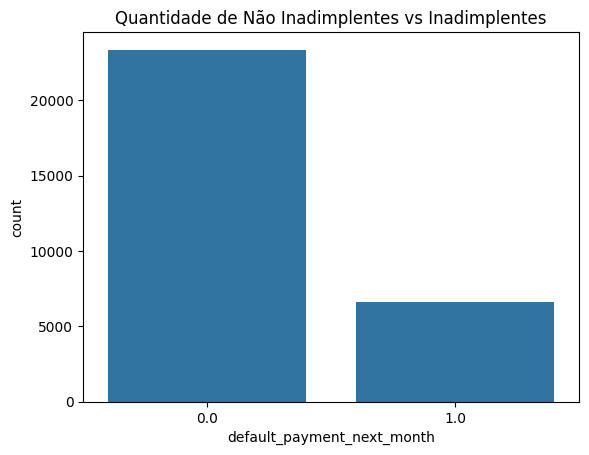

In [56]:
sns.countplot(data=df, x='default_payment_next_month')
plt.title('Quantidade de Não Inadimplentes vs Inadimplentes')
plt.show()

conseguimos ver que a quantidade de não inadinplentes é maior do que a de inadimplentes, para ser sincero foi contrário ao que eu achei quando comecei a analizar os dados.

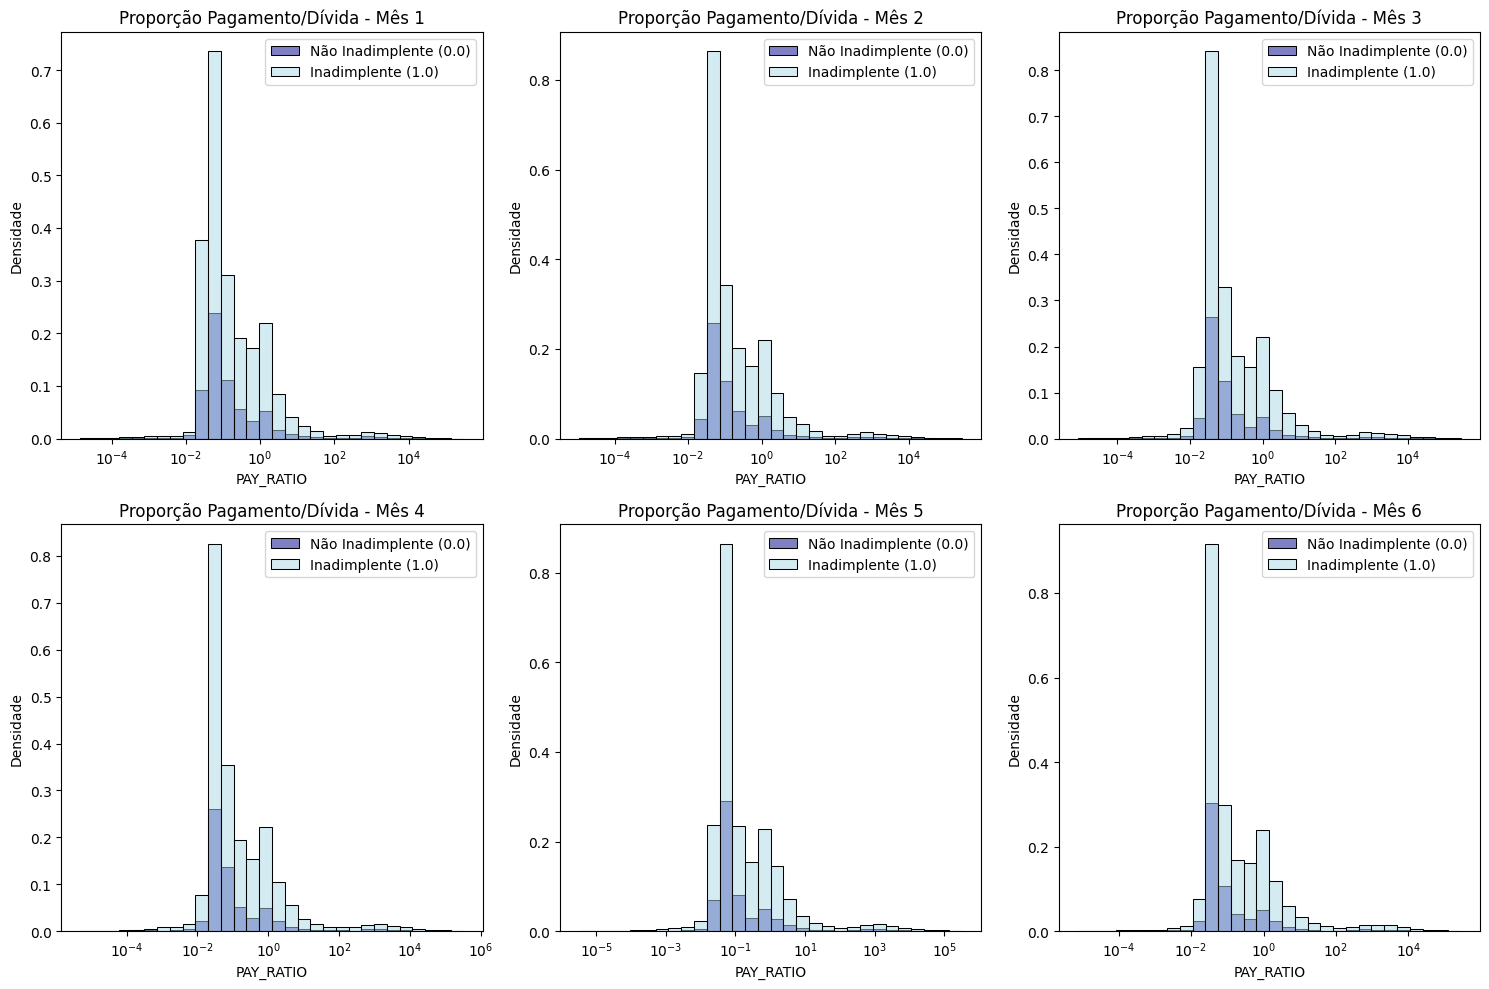

In [60]:

# Criar as colunas PAY_RATIO para os seis meses
for i in range(1, 7):
    df[f'PAY_RATIO_{i}'] = df[f'PAY_AMT{i}'] / (df[f'BILL_AMT{i}'] + 1)

# Criar uma grade de subplots (2 linhas x 3 colunas)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Ajuste o tamanho para melhor visualização
axes = axes.flatten()  # Transforma a grade em uma lista 1D para facilitar o loop

# Definir a paleta personalizada (azul claro para 0.0, azul escuro para 1.0)
custom_palette = ['#ADD8E6', '#00008B']

# Gerar histogramas para cada mês
for i, ax in enumerate(axes):
    if i < 6:  # Garante que só criamos 6 gráficos
        sns.histplot(data=df, x=f'PAY_RATIO_{i+1}', hue='default_payment_next_month', bins=30, 
                     stat='density', log_scale=True, palette=custom_palette, ax=ax)
        ax.set_title(f'Proporção Pagamento/Dívida - Mês {i+1}')
        ax.set_xlabel('PAY_RATIO')
        ax.set_ylabel('Densidade')
        ax.legend(labels=['Não Inadimplente (0.0)', 'Inadimplente (1.0)'])

# Ajustar o layout e exibir
plt.tight_layout()
plt.show()